In [59]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


In [60]:
import pandas as pd  
import numpy as np


#error stuff calculation
import math
import sklearn.metrics
from sklearn import metrics
import matplotlib.pyplot as plt 


#let us import dataset from our utd server
data = pd.read_csv('https://personal.utdallas.edu/~jxc210050/gold_price_data_2.csv')
# let us keep the data in a dataframe 
df = pd.DataFrame(data)
df1 = pd.DataFrame(data)

print(df)
df.describe()

             Date    Value
0      1970-01-01    35.20
1      1970-04-01    35.10
2      1970-07-01    35.40
3      1970-10-01    36.20
4      1971-01-01    37.40
...           ...      ...
10782  2020-03-09  1672.50
10783  2020-03-10  1655.70
10784  2020-03-11  1653.75
10785  2020-03-12  1570.70
10786  2020-03-13  1562.80

[10787 rows x 2 columns]


,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


In [61]:
#step 2 : pre processing
print(df.isna().sum())
# if we have nulls delete them
if(df.isna().sum().sum()>0):
  df = df.dropna()
# let us drop redundant data rows from our dataset.
if(df.duplicated().sum()):
  df.drop_duplicates()

Date     0
Value    0
dtype: int64


In [62]:
print(df)
df.describe()

             Date    Value
0      1970-01-01    35.20
1      1970-04-01    35.10
2      1970-07-01    35.40
3      1970-10-01    36.20
4      1971-01-01    37.40
...           ...      ...
10782  2020-03-09  1672.50
10783  2020-03-10  1655.70
10784  2020-03-11  1653.75
10785  2020-03-12  1570.70
10786  2020-03-13  1562.80

[10787 rows x 2 columns]


,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


In [63]:
#let us convert our date column into DateTime type

df1.Date = pd.to_datetime(df1.Date,yearfirst=True)
print(df1)
df1.Date.describe()

            Date    Value
0     1970-01-01    35.20
1     1970-04-01    35.10
2     1970-07-01    35.40
3     1970-10-01    36.20
4     1971-01-01    37.40
...          ...      ...
10782 2020-03-09  1672.50
10783 2020-03-10  1655.70
10784 2020-03-11  1653.75
10785 2020-03-12  1570.70
10786 2020-03-13  1562.80

[10787 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


count                   10787
unique                  10787
top       1970-01-01 00:00:00
freq                        1
first     1970-01-01 00:00:00
last      2020-03-13 00:00:00
Name: Date, dtype: object

In [64]:
#Set Date column as index
df1.set_index("Date",inplace=True)



In [65]:
# setting the frequency as day
df1 = df1.asfreq('d')

print(df1)
df1.describe()

              Value
Date               
1970-01-01    35.20
1970-01-02      NaN
1970-01-03      NaN
1970-01-04      NaN
1970-01-05      NaN
...             ...
2020-03-09  1672.50
2020-03-10  1655.70
2020-03-11  1653.75
2020-03-12  1570.70
2020-03-13  1562.80

[18335 rows x 1 columns]


,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


In [66]:

df1 = df1.fillna(method='ffill')

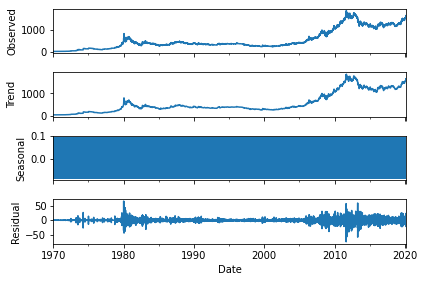

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed_value_graph = seasonal_decompose(df1['Value'])
decomposed_value_graph.plot();

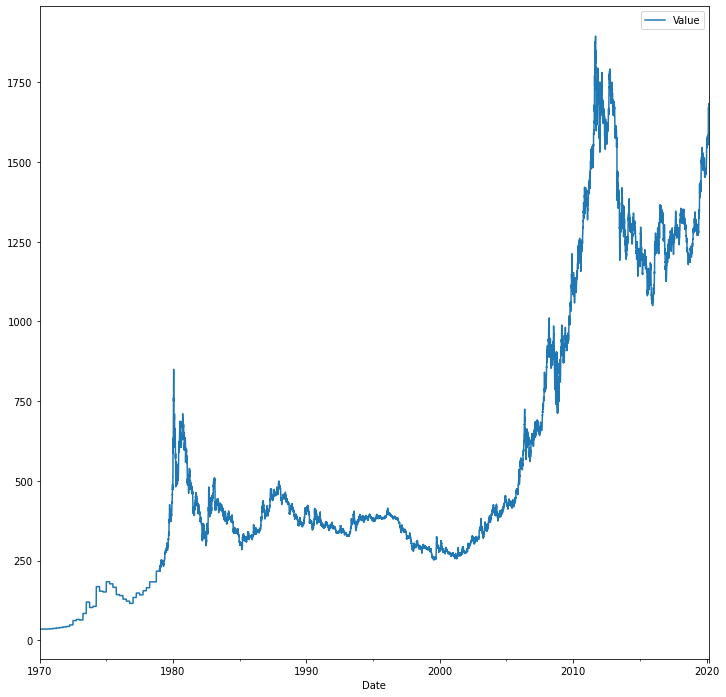

In [68]:
# lets see how gold price values are changing with time
df1.plot(figsize=(12,12))


In [69]:
data = pd.read_csv('https://personal.utdallas.edu/~jxc210050/gold_price_data_2.csv')
# let us keep the data in a dataframe 
df1 = pd.DataFrame(data)
df1=df.fillna(df1['Value'].mean())
df1['Date'] =  pd.to_datetime(df1['Date'], format='%Y-%m-%d %H:%M:%S')
df1 = df1.set_index(pd.DatetimeIndex(df1['Date']))
    

In [70]:
window = 10
x = df1.resample('1D',axis=0).mean()
fit_in_minimaxscaler = x.iloc[:, 0].values
        #scale=MinMaxScaler().fit_transform(scale.reshape(-1, 1))
mini_max_scaler = MinMaxScaler()
fit_in_minimaxscaler =mini_max_scaler.fit_transform(fit_in_minimaxscaler.reshape(-1, 1))
x['0_1_scale']=fit_in_minimaxscaler
# let us use first fill here e prices should follow a trend and using mean here would disturb the trend.
df1 = x.fillna(method='ffill')
print(df1)


              Value  0_1_scale
Date                          
1970-01-01    35.20   0.000054
1970-01-02    35.20   0.000054
1970-01-03    35.20   0.000054
1970-01-04    35.20   0.000054
1970-01-05    35.20   0.000054
...             ...        ...
2020-03-09  1672.50   0.880370
2020-03-10  1655.70   0.871337
2020-03-11  1653.75   0.870289
2020-03-12  1570.70   0.825636
2020-03-13  1562.80   0.821388

[18335 rows x 2 columns]


In [71]:
#train split - taking first 16000 rows as train data where depending on our window size, window+1 would be y(dependant attribute)
X_train = []
train = df1[0:16000]
train.shape
Y_train = []
# let us iterate through training data to divide data into x and y sets
for i in range(len(train) - window):
            # for example if window = 3 ; x will have 1,2,3 and y will have 4
            X_train.append(train['0_1_scale'][i:i+window])
            #4th value i.e., i+window will be y
            Y_train.append(train['0_1_scale'][i+window])

#just making x and y train to arrays to make them in accordance to our model
X_train = np.array(X_train)
X_train.shape
#[[1 2 3] [5 6 7].....]
X_train = np.expand_dims(X_train, axis=2)
X_train.shape
Y_train = np.array(Y_train)
Y_train.shape
print(X_train)
Y_train = np.expand_dims(Y_train, axis=1)
Y_train.shape # (10777, 1)

[[[5.37663315e-05]
  [5.37663315e-05]
  [5.37663315e-05]
  ...
  [5.37663315e-05]
  [5.37663315e-05]
  [5.37663315e-05]]

 [[5.37663315e-05]
  [5.37663315e-05]
  [5.37663315e-05]
  ...
  [5.37663315e-05]
  [5.37663315e-05]
  [5.37663315e-05]]

 [[5.37663315e-05]
  [5.37663315e-05]
  [5.37663315e-05]
  ...
  [5.37663315e-05]
  [5.37663315e-05]
  [5.37663315e-05]]

 ...

 [[6.82240981e-01]
  [6.79283832e-01]
  [6.61540943e-01]
  ...
  [6.65842250e-01]
  [6.90440346e-01]
  [6.88961772e-01]]

 [[6.79283832e-01]
  [6.61540943e-01]
  [6.61540943e-01]
  ...
  [6.90440346e-01]
  [6.88961772e-01]
  [6.88961772e-01]]

 [[6.61540943e-01]
  [6.61540943e-01]
  [6.61540943e-01]
  ...
  [6.88961772e-01]
  [6.88961772e-01]
  [6.88961772e-01]]]


(15990, 1)

In [72]:
#validation data split . from 16000 - last as validation data
X_Val = []
Y_Val = []
# let us iterate through validation data to divide data into x and y sets 
for i in range(16000,18334 - window ):
            # for example if window = 3 ; x will have 1,2,3 and y will have 4
            X_Val.append(df1['0_1_scale'][i:i+window])
            #4th value i.e., i+window will be y
            Y_Val.append(df1['0_1_scale'][i+window])

#just making x and y train to arrays to make them in accordance to our model
X_Val = np.array(X_Val)
X_Val.shape
#[[1 2 3] [5 6 7].....]
X_Val = np.expand_dims(X_Val, axis=2)
X_Val.shape
Y_Val = np.array(Y_Val)
Y_Val.shape
Y_Val = np.expand_dims(Y_Val, axis=1)
Y_Val.shape # (2324, 1)

(2324, 1)

In [73]:
class RNN:
    def __init__(self,X_train,Y_train,X_val,Y_val,epoch,learningRate,window,hidden_neurons,output_size,vanishing_gradient_min_check
                 ,vanishing_gradient_max_check ,back_propogation_limit):
        self.vanishing_gradient_min_check= vanishing_gradient_min_check
        self.vanishing_gradient_max_check  = vanishing_gradient_max_check 
        self.back_propogation_limit = back_propogation_limit

        self.w1 = None
        self.w2 = None
        self.w3 = None
        #let us just initilalise all our params
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_val = X_val
        self.Y_val = Y_val
        self.epoch = epoch
        self.window = window
        self.hidden_neurons= hidden_neurons
        self.output_size = output_size
        self.learningRate = learningRate
        self.epoch = epoch
       
    def sigmoid_activation(self,i):
        # sigmoid activation function formula
        return 1 / (1 + np.exp(-i))    

    def RMSE(self,X_train,Y_train ,w1,w2,w3):
        hidden_neurons = self.hidden_neurons
        window = self.window
        n = Y_train.shape[0]
        # initialiing loss to 0.0
        loss = 0.0
        #forward pass 
        for i in range(n):
            #for each row
            state_old = np.zeros((hidden_neurons, 1))   


            date= X_train[i]
            value =  Y_train[i]                  
            for elem_in_window in range(window):

                ip = np.zeros(date.shape)    
                ip[elem_in_window] = date[elem_in_window]              
                w1_dot_prod = np.dot(w1, ip)
                w3_dot_prod = np.dot(w3, state_old)
                sum_of_weights = w1_dot_prod + w3_dot_prod 
                current_state = self.sigmoid_activation(sum_of_weights)
                w2_dot_prod = np.dot(w2, current_state)
                state_old = current_state


            updated_loss = (value - w2_dot_prod)**2 / 2
            loss += updated_loss
        return loss,value


       
    def train(self):
        learningRate = self.learningRate
        back_propogation_limit = self.back_propogation_limit
        hidden_neurons = self.hidden_neurons
        output_size = self.output_size
        vanishing_gradient_min_check = self.vanishing_gradient_min_check
        vanishing_gradient_max_check  = self.vanishing_gradient_max_check 
        window = self.window
        np.random.seed(1200)
        #lets start with giving some random weights first
        w1 = np.random.uniform(0, 1, (hidden_neurons, window))
        w3 = np.random.uniform(0, 1, (hidden_neurons, hidden_neurons))
        w2 = np.random.uniform(0, 1, (output_size, hidden_neurons))
        X_train = self.X_train
        Y_train = self.Y_train
        X_val = self.X_val
        Y_val = self.Y_val
        loss = 0.0
        for epochs in range(self.epoch):
          #loss on training data
            loss,value = self.RMSE(X_train,Y_train,w1,w2,w3)
            loss = loss / float(value.shape[0])

            validation_loss,value = self.RMSE(X_val,Y_val,w1,w2,w3)
            validation_loss = validation_loss / float(value.shape[0])
            print('Epoch: ', epochs + 1, '/',self.epoch,', Training Loss: ', loss, ', Validation Loss: ', validation_loss)
            #Train
            for i in range(Y_train.shape[0]):
                d_w1 = np.zeros(w1.shape)
                d_w2 = np.zeros(w2.shape)
                d_w3 = np.zeros(w3.shape)
                date, value = X_train[i], Y_train[i]
                layers = []
                state_old = np.zeros((hidden_neurons, 1))
                
                d_w1_1 = np.zeros(w1.shape)
                d_w2_1 = np.zeros(w2.shape)
                d_w3_1 = np.zeros(w3.shape)
                d_w1_2 = np.zeros(w1.shape)
                d_w3_2 = np.zeros(w3.shape)

                for elem_in_window in range(window):
                    ip = np.zeros(date.shape)
                    ip[elem_in_window] = date[elem_in_window]
                    dot_prod_w1 = np.dot(w1, ip)
                    dot_prod_w3 = np.dot(w3, state_old)
                    sum_of_wx =  dot_prod_w1 + dot_prod_w3
                    current_state = self.sigmoid_activation(sum_of_wx)
                    dot_prod_w2 = np.dot(w2, current_state)
                    layers.append({'current_state':current_state, 'state_old':state_old})
                    state_old = current_state


                d_dot_w2 = (dot_prod_w2 - value)
                for elem_in_window in range(window):
                    d_w2_1  = np.dot(d_dot_w2, np.transpose(layers[elem_in_window]['current_state']))
                    z1 = np.dot(np.transpose(w2),d_dot_w2)

                    z2 = z1
                    delta_sums = sum_of_wx * (1 - sum_of_wx) * z2

                    d_dot_w3 = delta_sums * np.ones_like(dot_prod_w3)

                    delta_state_old = np.dot(np.transpose(w3), d_dot_w3)


                    for i in range(elem_in_window-1, max(-1, elem_in_window-back_propogation_limit-1), -1):
                        z2 = z1 + delta_state_old
                        delta_sums = sum_of_wx * (1 - sum_of_wx) * z2

                        d_dot_w3 = delta_sums * np.ones_like(dot_prod_w3)
                        d_dot_w1 = delta_sums * np.ones_like(dot_prod_w1)

                        d_w3_2 = np.dot(w3, layers[elem_in_window]['state_old'])
                        delta_state_old = np.dot(np.transpose(w3), d_dot_w3)

                        ip = np.zeros(date.shape)
                        ip[elem_in_window] = date[elem_in_window]
                        d_w1_2 = np.dot(w1, ip)
                        z3 = np.dot(np.transpose(w1), d_dot_w1)

                        d_w1_1 += d_w1_2
                        d_w3_1 += d_w3_2

                    d_w2 += d_w2_1
                    d_w1 += d_w1_1
                    d_w3 += d_w3_1

                    #checking weight 1 to be below our check to avoid vanishing gradient 

                    if d_w1.max() > vanishing_gradient_max_check :
                        d_w1[d_w1 > vanishing_gradient_max_check ] = vanishing_gradient_max_check 
                    if d_w1.min() < vanishing_gradient_min_check:
                        d_w1[d_w1 < vanishing_gradient_min_check] = vanishing_gradient_min_check

                    #for weight 2 
                    if d_w2.max() > vanishing_gradient_max_check :
                        d_w2[d_w2 > vanishing_gradient_max_check ] = vanishing_gradient_max_check 
                    if d_w2.min() < vanishing_gradient_min_check:
                        d_w2[d_w2 < vanishing_gradient_min_check] = vanishing_gradient_min_check


                    # for weight 3
                    if d_w3.max() > vanishing_gradient_max_check :
                        d_w3[d_w3 > vanishing_gradient_max_check ] = vanishing_gradient_max_check       
                   
                    if d_w3.min() < vanishing_gradient_min_check:
                        d_w3[d_w3 < vanishing_gradient_min_check] = vanishing_gradient_min_check

                # new weights
                w1 -= learningRate * d_w1
                w2 -= learningRate * d_w2
                w3 -= learningRate * d_w3  
        
        # final weights
        self.w1 = w1
        self.w3 = w3
        self.w2 = w2
                
    #prediction on train data
    def predicting_on_training(self):
        hidden_neurons = self.hidden_neurons
        w1 = self.w1
        w2 = self.w2
        w3 = self.w3
        Y_train = self.Y_train
        X_train = self.X_train
        window = self.window
        answer = []
        for i in range(Y_train.shape[0]):
            xi, yi = X_train[i], Y_train[i]
            state_old = np.zeros((hidden_neurons, 1))
            for elem_in_window in range(window):
                dot_prod_w1 = np.dot(w1, xi)
                dot_prod_w3 = np.dot(w3, state_old)
                sum_of_wx = dot_prod_w1 + dot_prod_w3
                current_state = self.sigmoid_activation(sum_of_wx)
                dot_prod_w2 = np.dot(w2, current_state)
                state_old = current_state
            answer.append(dot_prod_w2)
        return answer
    
    #predict function on validation data
    def predicting_on_validation(self):
        hidden_neurons = self.hidden_neurons
        w1 = self.w1
        w2 = self.w2
        w3 = self.w3
        X_val = self.X_val
        Y_val = self.Y_val
        window = self.window
        output = []
        for i in range(Y_val.shape[0]):
            x, y = X_val[i], Y_val[i]

            state_old = np.zeros((hidden_neurons, 1))
            for elem_in_window in range(window):
                dot_prod_w1 = np.dot(w1, x)
                dot_prod_w3 = np.dot(w3, state_old)


                sum_weights = dot_prod_w1 + dot_prod_w3
                current_state = self.sigmoid_activation(sum_weights)
                dot_prod_w2 = np.dot(w2, current_state)
                state_old = current_state
            output.append(dot_prod_w2)
        return output
        




In [74]:
modelh = RNN(X_train,Y_train,X_Val,Y_Val,2,0.0005,10,136,1,-5,5,5)# # 6)
#modelh = RNN(X_train,Y_train,X_Val,Y_Val,2,0.0002,10,136,1,-10,10,5)
modelh.train()
#modelh = MyRNNmodel(0.0005,3,10,136,1,5,-5,5,X_train,Y_train,X_Val,Y_Val)--97



#  modelh = RNN(X_train,Y_train,X_Val,Y_Val,2,0.0005,10,136,1,-5,5,5)# # 6) Train Model -- answer



#getting predictions and plotting the graph
training_output = modelh.predicting_on_training()
training_output = np.array(training_output)
#modelh = RNN(X_train,Y_train,X_Val,Y_Val,5,0.0004,10,136,1,-10,10,5)# # 6) Train Model ## goot with 200
#modelh = RNN(X_train,Y_train,X_Val,Y_Val,5,0.0002,10,136,1,-10,10,5)# # 6) Train Model  ## 74, 27 ##67,10 --4th epoch
#modelh = RNN(X_train,Y_train,X_Val,Y_Val,4,0.0001,10,136,1,-10,10,5)# # 6) Train Model.  420,1.8
# till now #for i in range(16000,18334 - window ):
#modelh = RNN(X_train,Y_train,X_Val,Y_Val,20,0.0002,10,136,1,-9,9,5)# # 6) Train Model 120,7 6th iteration'
#modelh = RNN(X_train,Y_train,X_Val,Y_Val,4,0.00009,10,136,1,-10,10,5)# # 6) Train Model. 161, 10 for 4 epochs



 


Epoch:  1 / 2 , Training Loss:  [[40647911.99784667]] , Validation Loss:  [[5834788.03686466]]
Epoch:  2 / 2 , Training Loss:  [[97.23306015]] , Validation Loss:  [[19.53284723]]


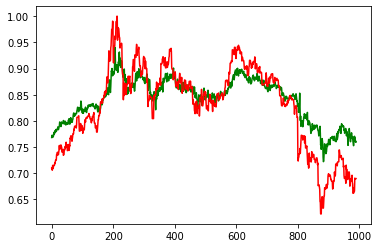

"\nplt.plot(training_output2, 'g')\nplt.plot(z[:, 0], 'r')\nplt.show()\n"

In [80]:
#graph for training data
training_output.shape
training_output1 = training_output[:, 0]
aa1 = training_output1[15000:16000]
training_output2 = mini_max_scaler.inverse_transform(training_output[:, 0])
z = mini_max_scaler.inverse_transform(Y_train)
z1 = Y_train[:, 0]
plt.plot(aa1, 'g')
plt.plot(z1[15000:16000], 'r')
plt.show()

"""
plt.plot(training_output2, 'g')
plt.plot(z[:, 0], 'r')
plt.show()
"""

[[1473.15883863]
 [1458.31813914]
 [1460.9811312 ]
 ...
 [1612.00364406]
 [1611.78861167]
 [1613.42987397]]
[[1306.75]
 [1306.75]
 [1306.75]
 ...
 [1655.7 ]
 [1653.75]
 [1570.7 ]]


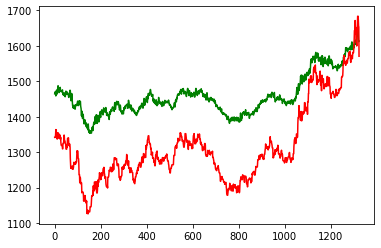

In [83]:
#graph for test data
tess = modelh.predicting_on_validation()
tess = np.array(tess)
#plotting the preds


tess = mini_max_scaler.inverse_transform(tess[:, 0])
print(tess)
z1 = mini_max_scaler.inverse_transform(Y_Val)
print(z1)
plt.plot(tess[1000:], 'g')
abc = z1[:, 0]
plt.plot(abc[1000:], 'r')
plt.show()


In [77]:
from sklearn.metrics import mean_squared_error
a= modelh.predicting_on_validation()
a1 = np.array(a)
b = a1[:, 0]
c= Y_Val[:,0]
mse = mean_squared_error(b, c)
print(mse)

0.00821087844672419


In [78]:
print(tess)

[[1473.15883863]
 [1458.31813914]
 [1460.9811312 ]
 ...
 [1612.00364406]
 [1611.78861167]
 [1613.42987397]]


In [79]:
print(z1)

[[1306.75]
 [1306.75]
 [1306.75]
 ...
 [1655.7 ]
 [1653.75]
 [1570.7 ]]
